In [12]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
data.head()

C:\Users\d1411\AppData\Local\Temp\ipykernel_21868\2753689072.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


C:\Users\d1411\AppData\Local\Temp\ipykernel_21868\1651911866.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_overview['nkill'] = pd.to_numeric(data_overview['nkill'], errors='coerce')
C:\Users\d1411\AppData\Local\Temp\ipykernel_21868\1651911866.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_overview['nwound'] = pd.to_numeric(data_overview['nwound'], errors='coerce')


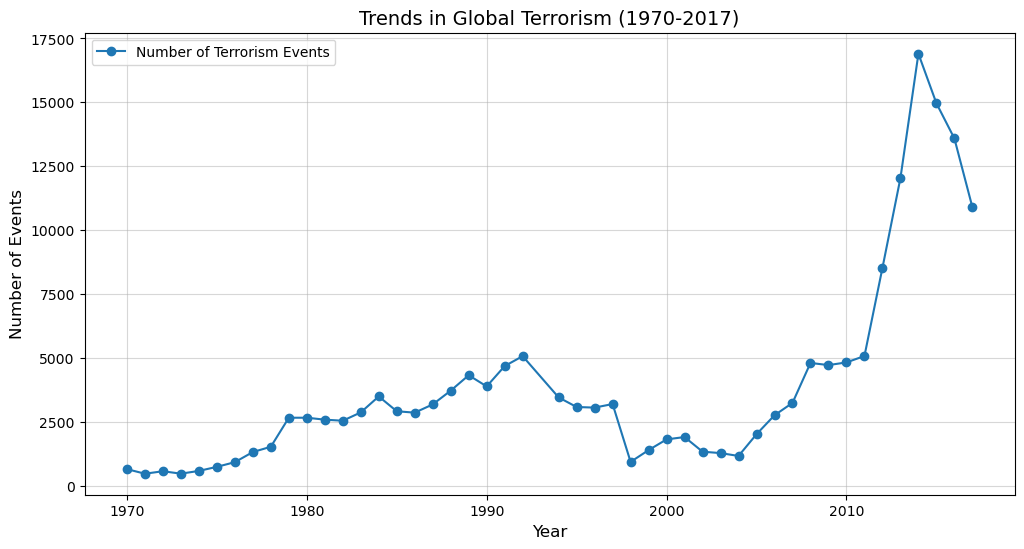

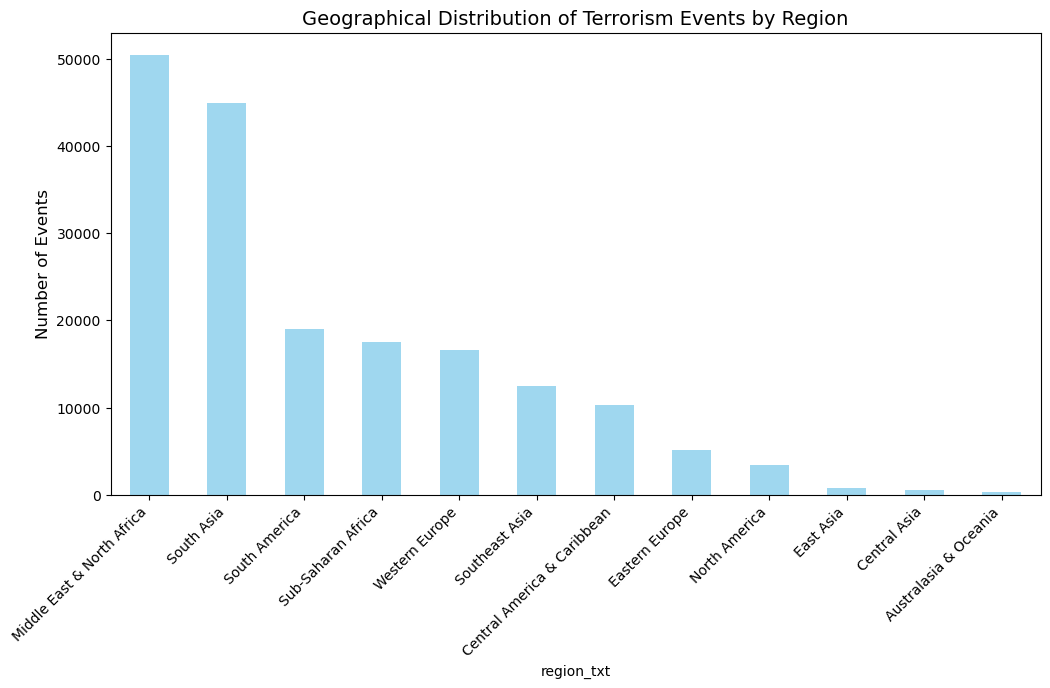

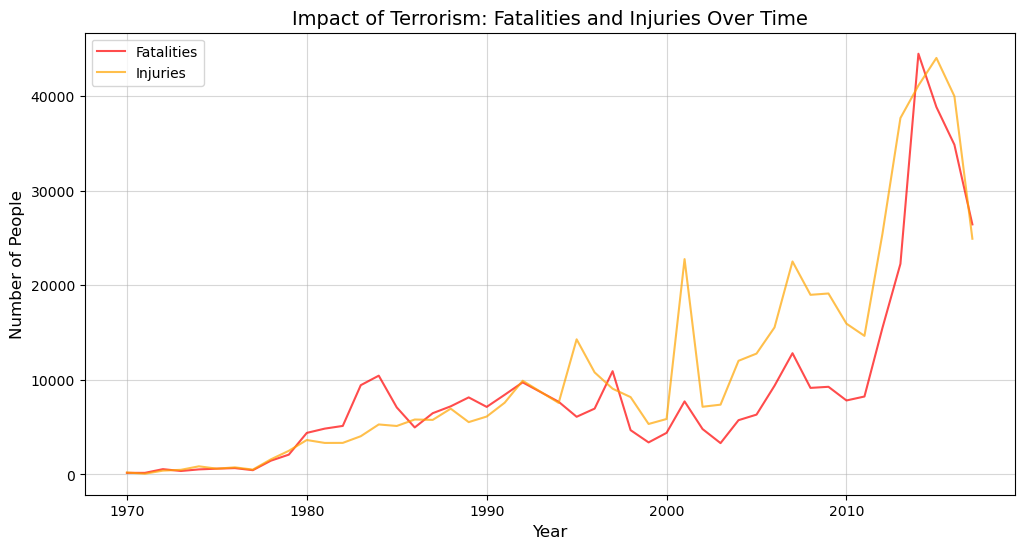

(2014, 2015, 'Middle East & North Africa')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns for an overview
columns_of_interest = ['iyear', 'region', 'region_txt', 'country', 'country_txt', 'attacktype1_txt', 
                       'targtype1_txt', 'nkill', 'nwound']

# Filter the data for these columns
data_overview = data[columns_of_interest]

# Handle missing values and convert columns to numeric where necessary
data_overview['nkill'] = pd.to_numeric(data_overview['nkill'], errors='coerce')
data_overview['nwound'] = pd.to_numeric(data_overview['nwound'], errors='coerce')

# Generate an overview visualization: terrorism over time
terrorism_trends = data_overview.groupby('iyear').size()

plt.figure(figsize=(12, 6))
plt.plot(terrorism_trends.index, terrorism_trends.values, marker='o', label="Number of Terrorism Events")
plt.title('Trends in Global Terrorism (1970-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

# Geographical distribution: Number of attacks per region
region_attacks = data_overview['region_txt'].value_counts()

plt.figure(figsize=(12, 6))
region_attacks.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Geographical Distribution of Terrorism Events by Region', fontsize=14)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.show()

# Fatalities and injuries: Top 10 deadliest years
fatalities_per_year = data_overview.groupby('iyear')['nkill'].sum()
injuries_per_year = data_overview.groupby('iyear')['nwound'].sum()

plt.figure(figsize=(12, 6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, label='Fatalities', color='red', alpha=0.7)
plt.plot(injuries_per_year.index, injuries_per_year.values, label='Injuries', color='orange', alpha=0.7)
plt.title('Impact of Terrorism: Fatalities and Injuries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# Display initial findings and identify areas to explore further
fatalities_per_year.idxmax(), injuries_per_year.idxmax(), region_attacks.idxmax()


Trends in Global Terrorism (1970–2017):
- A sharp increase in the number of terrorism events is observed after 2004, with a significant peak in 2014.

Geographical Distribution by Region:
- The Middle East & North Africa region accounts for the highest number of terrorism events, indicating its critical role in global terrorism trends.

Impact of Terrorism (Fatalities and Injuries):
- The deadliest year for fatalities was 2014, while the highest number of injuries occurred in 2015, showing a devastating impact during this period.

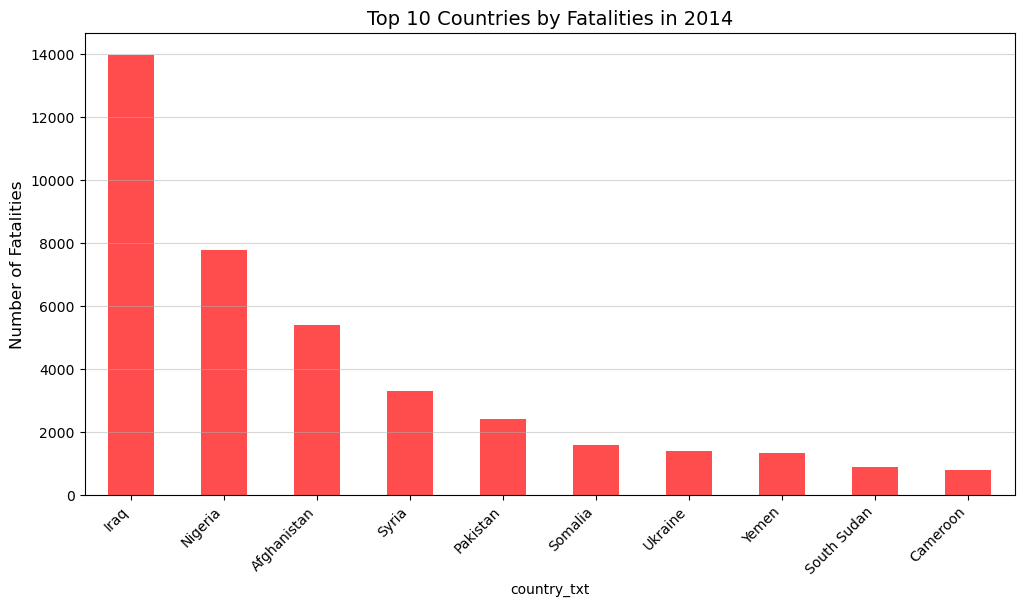

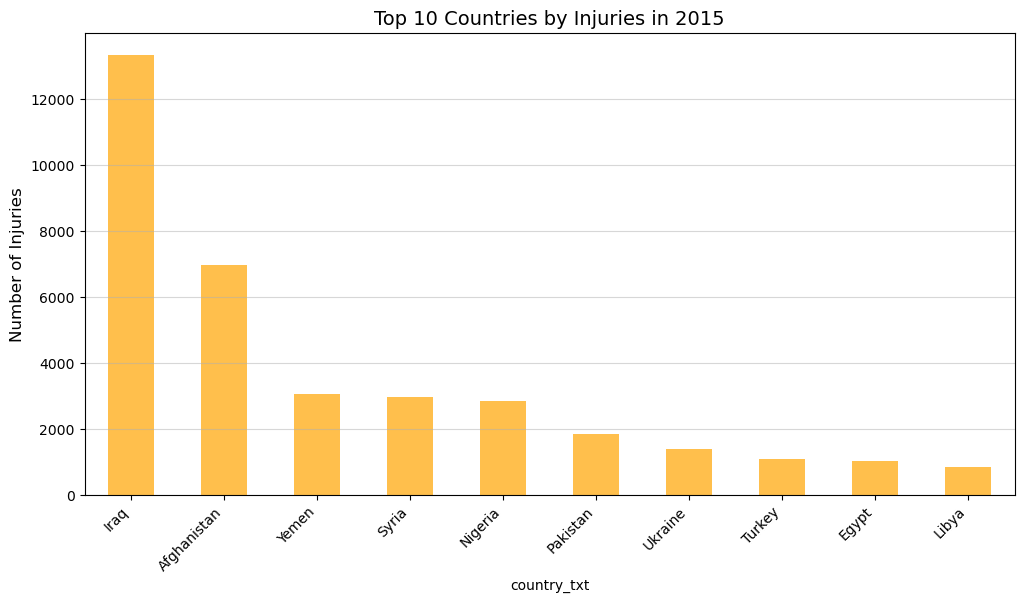

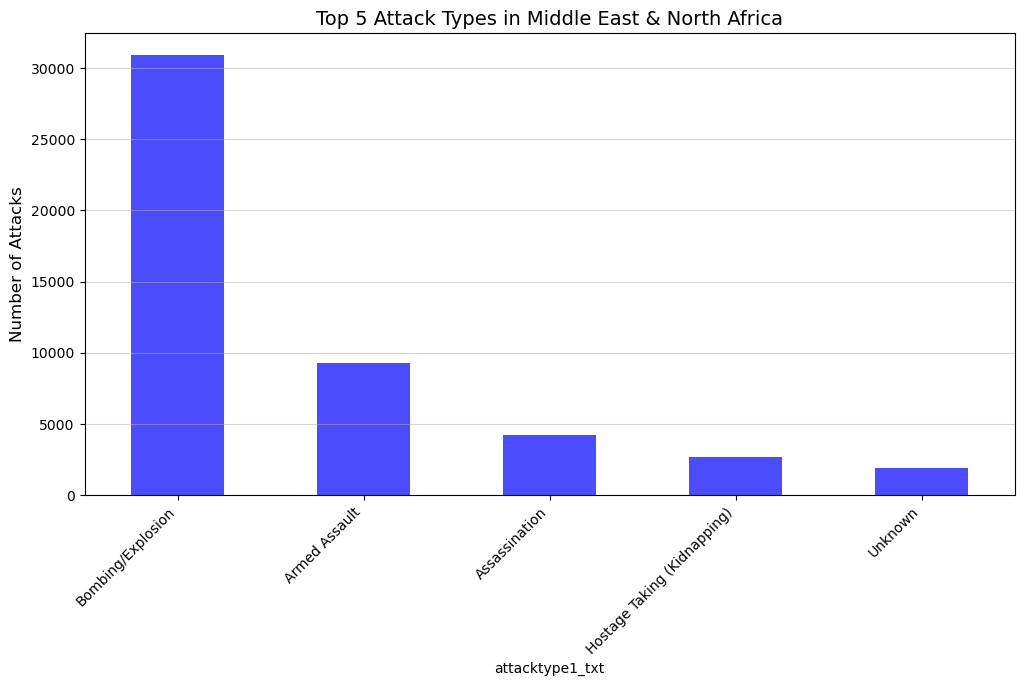

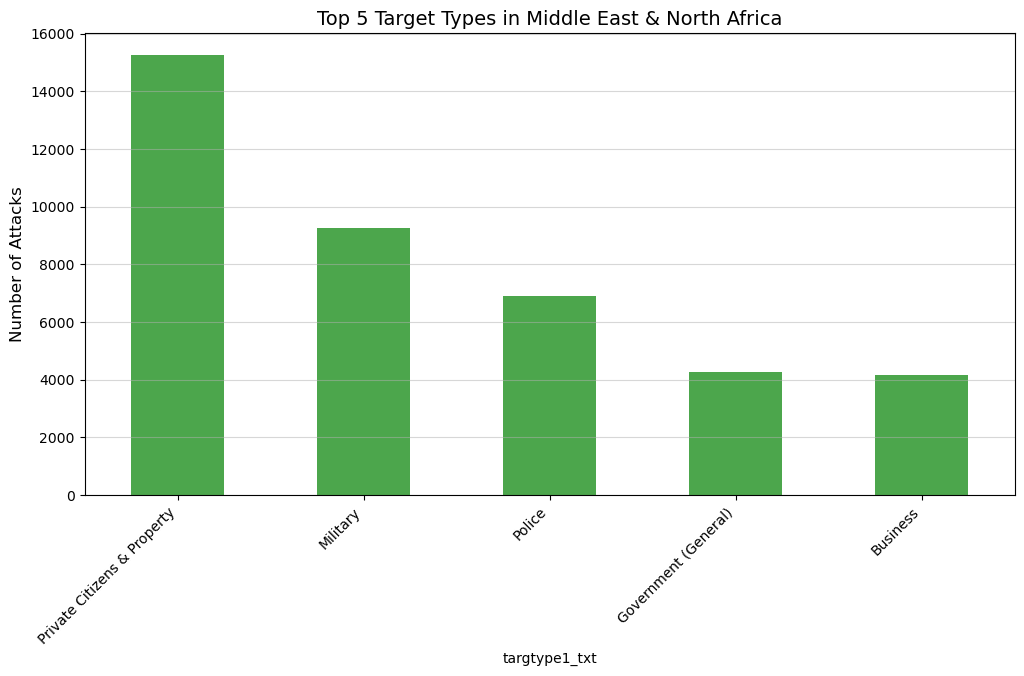

In [14]:
# Focus on 2014 fatalities and 2015 injuries
fatalities_2014 = data_overview[data_overview['iyear'] == 2014]
injuries_2015 = data_overview[data_overview['iyear'] == 2015]

# Group by countries for 2014 fatalities and 2015 injuries
fatalities_2014_by_country = fatalities_2014.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)
injuries_2015_by_country = injuries_2015.groupby('country_txt')['nwound'].sum().sort_values(ascending=False).head(10)

# Plotting top 10 countries for 2014 fatalities
plt.figure(figsize=(12, 6))
fatalities_2014_by_country.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Countries by Fatalities in 2014', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plotting top 10 countries for 2015 injuries
plt.figure(figsize=(12, 6))
injuries_2015_by_country.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Countries by Injuries in 2015', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Focus on Middle East & North Africa: attack types and targets
mena_data = data_overview[data_overview['region_txt'] == 'Middle East & North Africa']

attack_types_mena = mena_data['attacktype1_txt'].value_counts().head(5)
targets_mena = mena_data['targtype1_txt'].value_counts().head(5)

# Plot attack types
plt.figure(figsize=(12, 6))
attack_types_mena.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 5 Attack Types in Middle East & North Africa', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot targets
plt.figure(figsize=(12, 6))
targets_mena.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 5 Target Types in Middle East & North Africa', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()


Top 10 Countries by Fatalities in 2014:
- Countries like Iraq and Nigeria dominate the fatality counts, likely linked to insurgencies and conflicts involving groups like ISIS and Boko Haram.

Top 10 Countries by Injuries in 2015:
- Iraq, Afghanistan, and Pakistan are the top countries for injuries, reflecting ongoing violence and attacks on civilian populations.

Middle East & North Africa (MENA) Region:
- Attack Types:
    - The most common attack type is Bombing/Explosion, followed by Armed Assault, indicating a preference for high-impact, easily executed methods.
- Targets:
    - Civilian populations and private citizens are the primary targets, underscoring the human toll of these events.